In [1]:
import numpy as np
import bandit as Bandit_s
import bandit_non_stationary_rewards as Bandit_nsr
import bandit_optimistic as Bandit_opt
import bandit_ucb as Bandit_ucb
import matplotlib.pyplot as plt

In [2]:
config = {
    "numArms": 5,
    "epsilon": 0.1,
    "numPulls": 1000
}
#run1 = Bandit_s.simulate(config["numArms"], epsilon=config["epsilon"], numPulls=config["numPulls"])

## 1. Explore alpha in the nonstationary problem
alphas 0.1, 0.2 and 0.5

0
1000
0
1000
0
1000


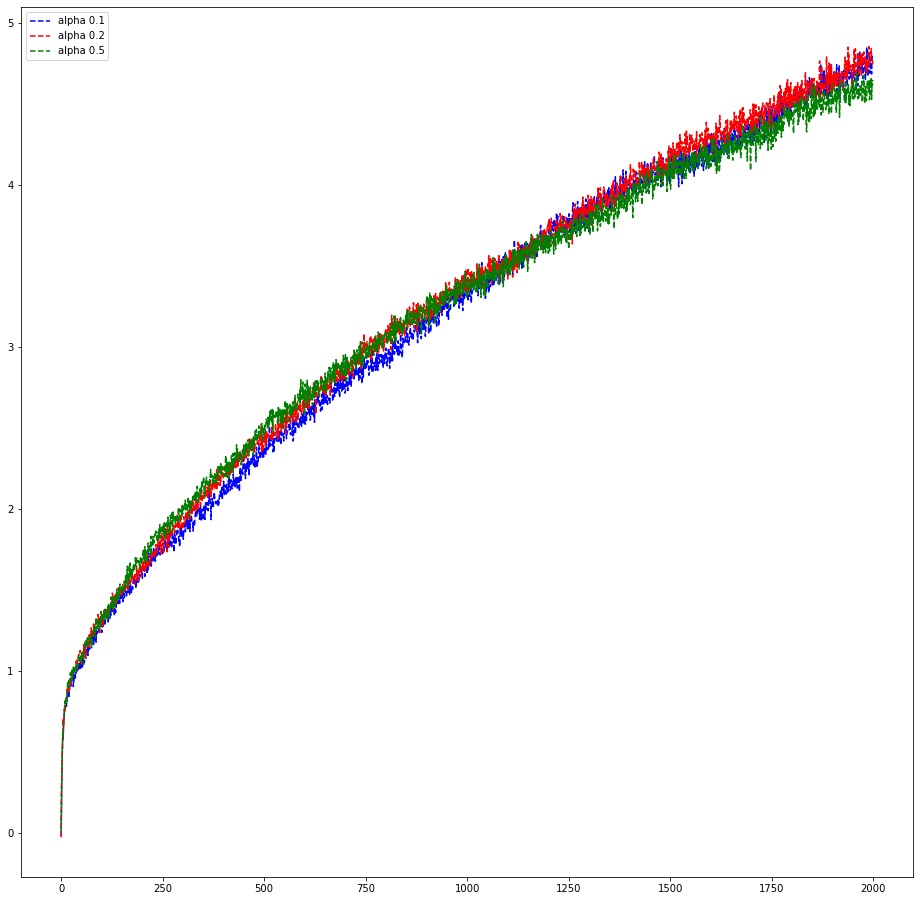

In [3]:
config = {
    "numArms": 5,
    "epsilon": 0.1,
    "numPulls": 2000,
    "mode": "constant",
    "alpha": [0.1, 0.2, 0.5]
}

results = []
for a in config["alpha"]:
    result = Bandit_nsr.simulate(config["numArms"], epsilon=config["epsilon"], numPulls=config["numPulls"], mode=config["mode"], alpha=a)
    results.append(result)
    
plt.figure(figsize=(16, 16))
plt.plot(results[0], 'b--', results[1], 'r--', results[2], 'g--')
plt.legend(['alpha 0.1', 'alpha 0.2', 'alpha 0.5'])
plt.show()    

## 1. Results

The alpha doesn't have a large impact on the models improvement rates itself, however a lower alpha gives a better result.

# 2. Optimistic problem with epsilon 0 and q_1 1, 5 and 10

0
1000
0
1000
0
1000


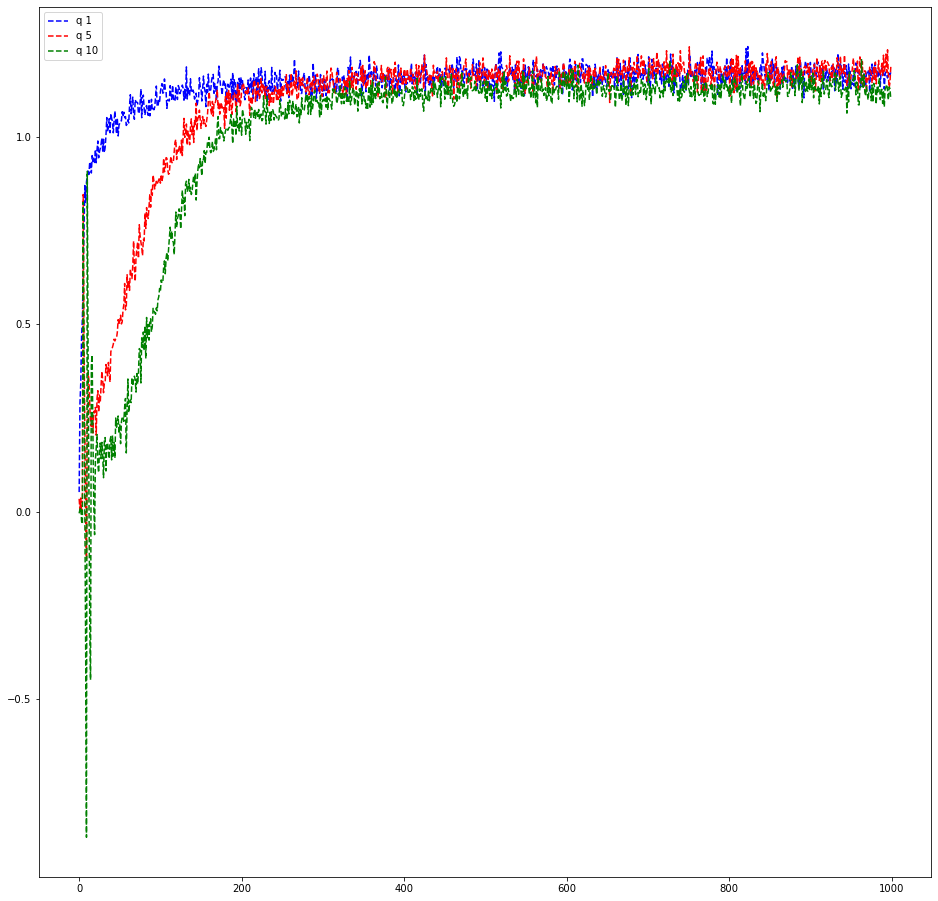

In [4]:
q_vals = [1,5,10]

results = []
for q in q_vals:
    result = Bandit_opt.simulate(5, epsilon=0.0, numPulls=1000, initialQ=q, mode='constant')
    results.append(result)
    
plt.figure(figsize=(16, 16))
plt.plot(results[0], 'b--', results[1], 'r--', results[2], 'g--')
plt.legend(['q 1', 'q 5', 'q 10'])
plt.show()  

## 2. results

While the endresult does not change much, the rate at which the model improves changes quite significantly. In this scenario, a lower q lets the model improve faster

# 3. Optimistic with epsilon 0.1

0
1000
0
1000
0
1000


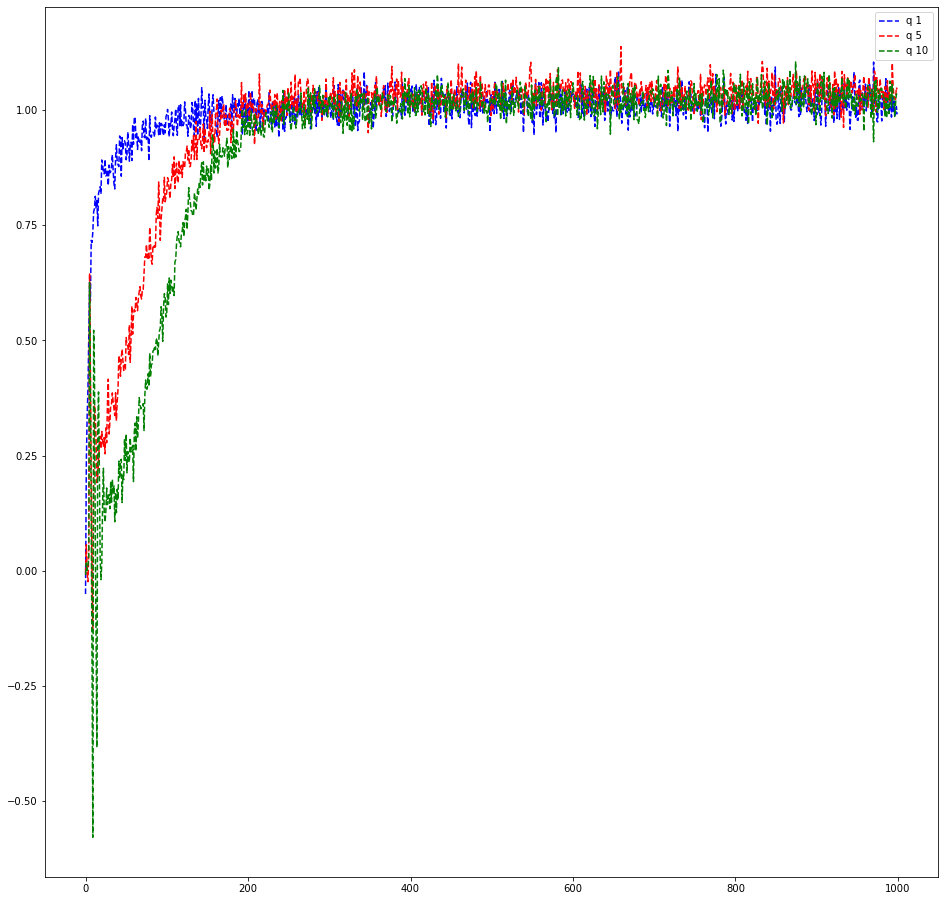

In [5]:
q_vals = [1,5,10]

results = []
for q in q_vals:
    result = Bandit_opt.simulate(5, epsilon=0.1, numPulls=1000, initialQ=q, mode='constant')
    results.append(result)
    
plt.figure(figsize=(16, 16))
plt.plot(results[0], 'b--', results[1], 'r--', results[2], 'g--')
plt.legend(['q 1', 'q 5', 'q 10'])
plt.show()  

## 3. results
Compared to the epsilon 0 model, this one converges to similar values at an earlier stage. The individual q values, however, stay quite similar. The overall values of the models do drop quite a bit though. In the epsilon 0 model we reach about 1.10-1.15 values on the y-axis, while in this one it caps out at close to 1.


# 4. Try a few different things

Epsilon greedy: 0.1 epsilon and Q0

Optimistic: 0 epsilon, q10

UCB: Q0, c2

0
1000
0
1000


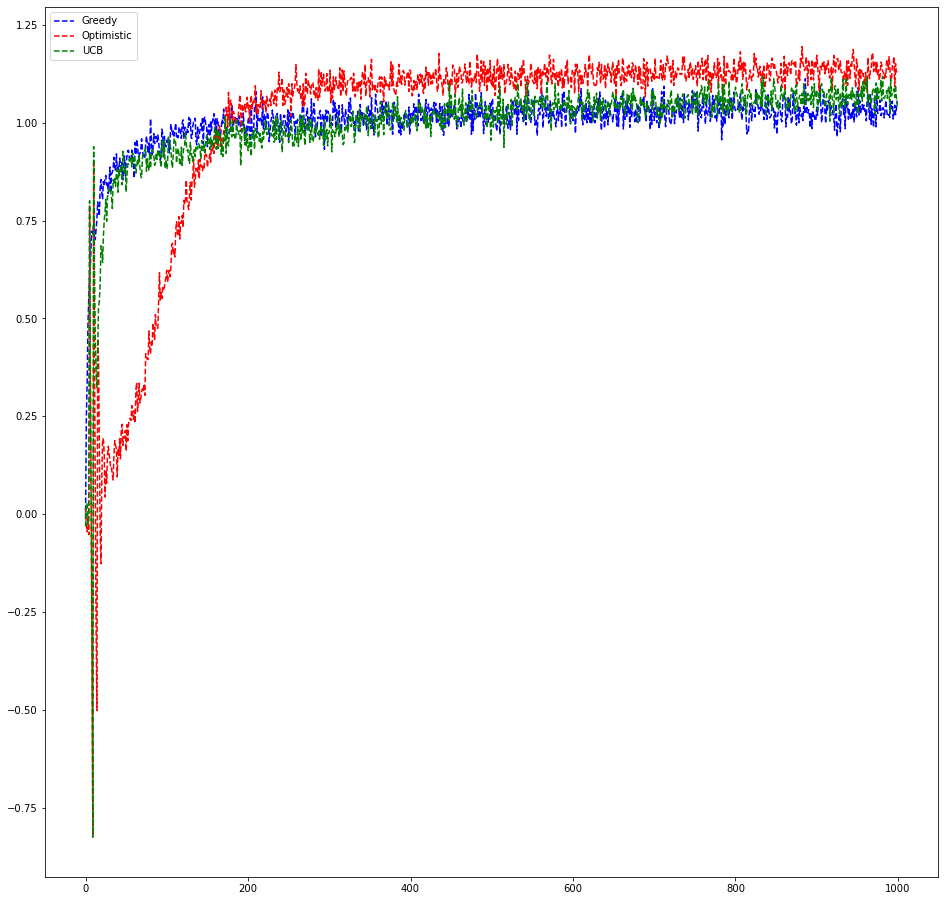

In [6]:


results = []

result = Bandit_s.simulate(5, epsilon=0.1, numPulls=1000)
results.append(result)

result = Bandit_opt.simulate(5, epsilon=0, numPulls=1000, initialQ=10, mode='constant')
results.append(result)

result = Bandit_ucb.simulate(5, epsilon=0, numPulls=1000, C=2, initialQ=0, mode='constant')
results.append(result)  

plt.figure(figsize=(16, 16))
plt.plot(results[0], 'b--', results[1], 'r--', results[2], 'g--')
plt.legend(['Greedy', 'Optimistic', 'UCB'])
plt.show()  

## 4. Results

The optimistic model has a slow start, but edges out a win towards the end. The epsilon greedy model starts out strong but doesn't really improve after the first 200 iterations, leaving the UCB model plenty of time to get past the epsilon greedy model. The UCB ends up just behind the optimistic model with 1000 iterations.

# 5. UCB q10

0
1000


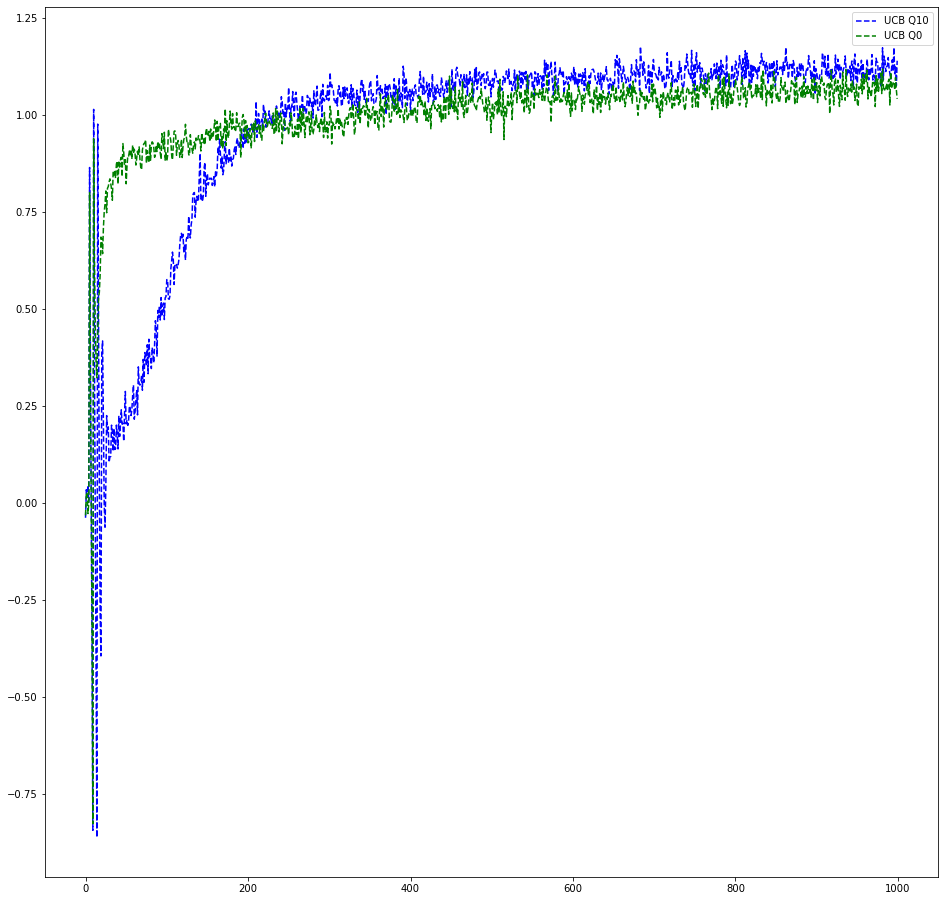

In [7]:
result = Bandit_ucb.simulate(5, epsilon=0, numPulls=1000, C=2, initialQ=10, mode='constant')

plt.figure(figsize=(16, 16))
plt.plot(result, 'b--', results[2], 'g--')
plt.legend(['UCB Q10', "UCB Q0"])
plt.show()  

## 5. Results

They perform similarly during the first few iterations, but then the Q0 one takes off quickly with the Q10 following behind slowly. Once they're both up to speed, they do improve at a very similar pace and the Q10 model does top out above the Q0 result once it finishes growing.